##  Desenvolvimento de Modelos de Predição do IPCA da Indústria de Transformação a Partir de Proxy para o Custo de Produção da Indústria de Transformação e Outros Indicadores - MACHINE LEARNING

A previsão do IPCA de Bens Industriais é realizada considerando os seguintes indicadores como variáveis exógenas:

IPA - para cálculo da Proxy do Custo de Produção da Indústria de Transformação;

IC-Br (Índice de Commodities);

IBC-Br (Índice de Atividade Econômica)

PIM-PF (Produção da Indústria Brasileira)

ICI (Índice de Confiança da Indústria) - contempla as desagregações: NUCI (Nível de Utilização da Capacidade Instalada) e Nível de Estoques

Consumo Aparente da Indústria de Transformação

Consumo de Energia Elétrica da Indústria

In [28]:
#Biblioteca para acessar e interagir com APIs e páginas da web
import requests 

# Bibliotecas para dados:
import pandas as pd
import numpy as np

#Biblioteca para criação de gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
#Bibliotecas de tratamento de estatistico de séries e de manipulação de datas e horários:

from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse

In [30]:
#Biblioteca para Análise de Estacionariedade por Teste de ADF

from statsmodels.tsa.stattools import adfuller

In [31]:
# Biblioteca para Geração de Gráfico de Função de Autocorrelação e Autocorrelação Parcial

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

In [32]:
#Bibliotecas para métricas de avaliação de modelos:

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.metrics import r2_score

from sklearn.metrics import root_mean_squared_error


In [33]:
# Bibilotecas para Normalização de Dados:

from sklearn.preprocessing import MinMaxScaler

In [34]:
# Biblioteca para conversão de data:

from datetime import datetime

In [35]:
# Biblioteca para GridSearch e TimeSeriesSplit para Cross Validation

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import TimeSeriesSplit

In [36]:
#Bibliotecas para Validação

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score

In [37]:
# Biblioteca para Análise de Componentes Principais (PCA):

from sklearn.decomposition import PCA

In [38]:
#Bibliotecas para RandomForest

from sklearn.ensemble import RandomForestRegressor

#Bibliotecas para RandomForest com AdaBoost:

from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

#Bibliotecas para RandomForest com GradientBoosting:

from sklearn.ensemble import GradientBoostingRegressor

In [39]:
# Biblioteca para GridSearch e TimeSeriesSplit para Cross Validation

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import TimeSeriesSplit

In [40]:
# Biblioteca para salvar e carregar modelos treinados

import joblib
import os

### Carregamento dos Dados em Formato csv

In [41]:
# Carregamento de Dados a partir de um arquivo CSV:

df_base1 = pd.read_csv('Dados/Base Completa/base_dados_2005.csv')
df_base1.head()

,Mes,Proxy - Custo Prod Ind Transf Var Mensal%,Ind Transf Sem Ajuste Sazonal Var Men (%),ICI,Nivel de estoques,NUCI,IBC-BR Variacao Mensal (%),IC - Composto Var Men (%),Consumo Aparente - Var Mensal,Consumo E. Eletrica Ind Var Mensal %,IPCA Bens Ind Var Mensal %
0,2005-01-31,0.250514,-4.469845,106.8,94.8,84.3,-3.756043,-0.315489,-3.616918,-5.533154,0.61
1,2005-02-28,0.409522,-5.588296,106.6,92.8,83.9,0.463679,-2.739591,-7.151135,0.758833,0.39
2,2005-03-31,0.754040,15.371508,103.5,91.6,83.4,10.980769,8.623144,16.362902,2.494705,0.35
3,2005-04-30,0.790196,-1.486933,102.1,90.7,82.2,-2.659851,-6.515634,-1.624174,2.365098,0.93
4,2005-05-31,-0.343708,4.662271,99.8,90.1,81.5,-1.326213,-6.629281,5.064549,-0.613130,0.75


In [42]:
df_base1

,Mes,Proxy - Custo Prod Ind Transf Var Mensal%,Ind Transf Sem Ajuste Sazonal Var Men (%),ICI,Nivel de estoques,NUCI,IBC-BR Variacao Mensal (%),IC - Composto Var Men (%),Consumo Aparente - Var Mensal,Consumo E. Eletrica Ind Var Mensal %,IPCA Bens Ind Var Mensal %
0,2005-01-31,0.250514,-4.469845,106.8,94.8,84.3,-3.756043,-0.315489,-3.616918,-5.533154,0.61
1,2005-02-28,0.409522,-5.588296,106.6,92.8,83.9,0.463679,-2.739591,-7.151135,0.758833,0.39
2,2005-03-31,0.754040,15.371508,103.5,91.6,83.4,10.980769,8.623144,16.362902,2.494705,0.35
3,2005-04-30,0.790196,-1.486933,102.1,90.7,82.2,-2.659851,-6.515634,-1.624174,2.365098,0.93
4,2005-05-31,-0.343708,4.662271,99.8,90.1,81.5,-1.326213,-6.629281,5.064549,-0.613130,0.75
...,...,...,...,...,...,...,...,...,...,...,...
235,2024-08-31,0.607579,1.384228,101.5,96.2,83.2,-1.342374,-2.305761,1.948814,3.082151,0.17
236,2024-09-30,0.775323,-3.341286,100.4,96.0,83.4,-2.664307,1.638534,-3.735931,-2.168758,0.16
237,2024-10-31,0.638631,4.040392,99.9,94.5,82.5,2.037204,4.610222,4.818552,-0.212816,0.26
238,2024-11-30,0.857047,-8.813216,99.1,95.5,81.7,-3.414003,3.900330,-12.924405,-0.225118,0.19


In [43]:
## Convertendo a data para formato datetime

df_base1['Mes'] = pd.to_datetime(df_base1['Mes'])


In [44]:
df_base1

,Mes,Proxy - Custo Prod Ind Transf Var Mensal%,Ind Transf Sem Ajuste Sazonal Var Men (%),ICI,Nivel de estoques,NUCI,IBC-BR Variacao Mensal (%),IC - Composto Var Men (%),Consumo Aparente - Var Mensal,Consumo E. Eletrica Ind Var Mensal %,IPCA Bens Ind Var Mensal %
0,2005-01-31,0.250514,-4.469845,106.8,94.8,84.3,-3.756043,-0.315489,-3.616918,-5.533154,0.61
1,2005-02-28,0.409522,-5.588296,106.6,92.8,83.9,0.463679,-2.739591,-7.151135,0.758833,0.39
2,2005-03-31,0.754040,15.371508,103.5,91.6,83.4,10.980769,8.623144,16.362902,2.494705,0.35
3,2005-04-30,0.790196,-1.486933,102.1,90.7,82.2,-2.659851,-6.515634,-1.624174,2.365098,0.93
4,2005-05-31,-0.343708,4.662271,99.8,90.1,81.5,-1.326213,-6.629281,5.064549,-0.613130,0.75
...,...,...,...,...,...,...,...,...,...,...,...
235,2024-08-31,0.607579,1.384228,101.5,96.2,83.2,-1.342374,-2.305761,1.948814,3.082151,0.17
236,2024-09-30,0.775323,-3.341286,100.4,96.0,83.4,-2.664307,1.638534,-3.735931,-2.168758,0.16
237,2024-10-31,0.638631,4.040392,99.9,94.5,82.5,2.037204,4.610222,4.818552,-0.212816,0.26
238,2024-11-30,0.857047,-8.813216,99.1,95.5,81.7,-3.414003,3.900330,-12.924405,-0.225118,0.19


## Criação de Variável Dummy para Regime de Exceção

Uma variável dummy para o período da pandemia e início da Guerra da Ucrânia foi criada para representar esse período de exceção no qual as regras normais não se aplicam. Ambos os eventos foram choques exógenos que impactaram a economia.

Para identificação do período do regime de exceção, veja o gráfico a seguir:

In [45]:
#Conversão da coluna Mes para índice do dataframe para o dataframe df_base1

df_base2 = df_base1.copy()
df_base2 = df_base2.set_index('Mes')

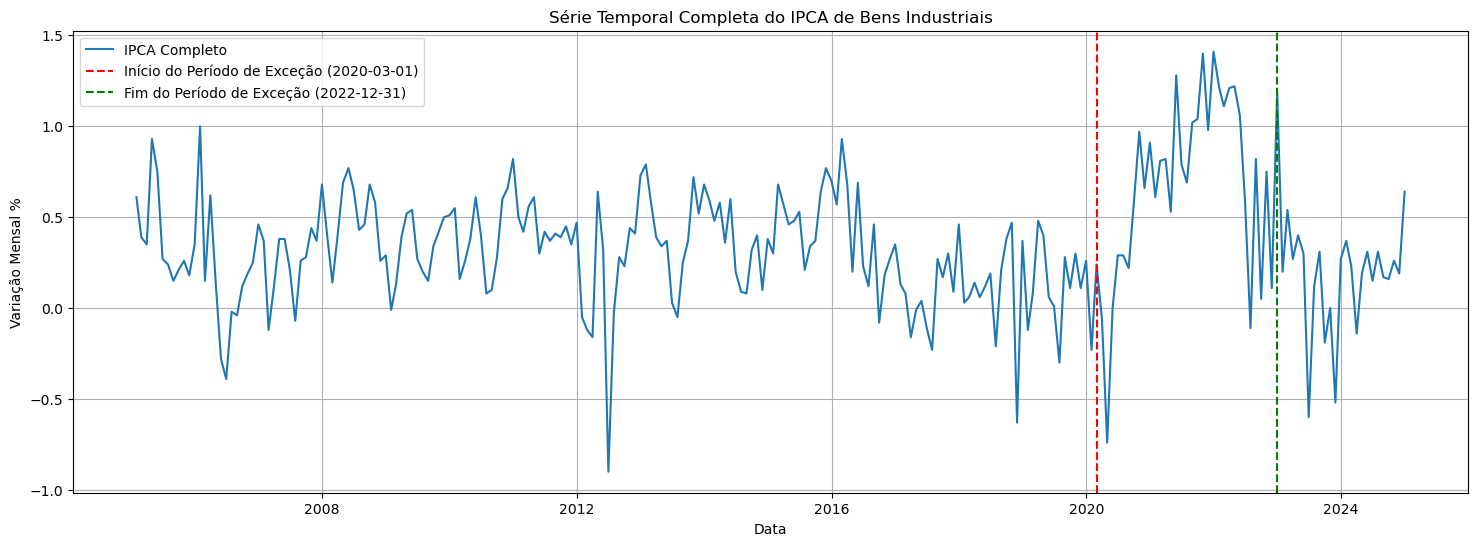

In [46]:
# Gráfico para visão geral
plt.figure(figsize=(18, 6))

# Plotagem da série inteira
plt.plot(df_base2.index, df_base2['IPCA Bens Ind Var Mensal %'], label='IPCA Completo')

# Encontrando a data de início da pandemia até final do período de início da guerra na Ucrânia
data_inicio = '2020-03-01'
data_fim = '2022-12-31'
data_inicio_dt = pd.to_datetime(data_inicio)
plt.axvline(data_inicio_dt, color='red', linestyle='--', label=f'Início do Período de Exceção ({data_inicio})')

data_fim_dt = pd.to_datetime(data_fim)
plt.axvline(data_fim_dt, color='green', linestyle='--', label=f'Fim do Período de Exceção ({data_fim})')

plt.title('Série Temporal Completa do IPCA de Bens Industriais')
plt.xlabel('Data')
plt.ylabel('Variação Mensal %')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Conversão da coluna Mes para índice do dataframe para o dataframe df_base1:

df_base1 = df_base1.set_index('Mes')

In [48]:
# Criação de Variável Dummy para Regime de Exceção

# 1. Definição das datas de início e fim
data_inicio = '2020-03-01'
data_fim = '2022-12-31'

# 2. Criar a coluna com o nome mais abrangente e inicializar com 0
df_base1['regime_excecao'] = 0

# 3. Selecionar o intervalo e definir o valor como 1
df_base1.loc[(df_base1.index >= data_inicio) & (df_base1.index <= data_fim), 'regime_excecao'] = 1

# 4. Verificar
print(df_base1['regime_excecao'].value_counts())

regime_excecao
0    206
1     34
Name: count, dtype: int64


In [49]:
df_base1

,Proxy - Custo Prod Ind Transf Var Mensal%,Ind Transf Sem Ajuste Sazonal Var Men (%),ICI,Nivel de estoques,NUCI,IBC-BR Variacao Mensal (%),IC - Composto Var Men (%),Consumo Aparente - Var Mensal,Consumo E. Eletrica Ind Var Mensal %,IPCA Bens Ind Var Mensal %,regime_excecao
Mes,,,,,,,,,,,
2005-01-31,0.250514,-4.469845,106.8,94.8,84.3,-3.756043,-0.315489,-3.616918,-5.533154,0.61,0
2005-02-28,0.409522,-5.588296,106.6,92.8,83.9,0.463679,-2.739591,-7.151135,0.758833,0.39,0
2005-03-31,0.754040,15.371508,103.5,91.6,83.4,10.980769,8.623144,16.362902,2.494705,0.35,0
2005-04-30,0.790196,-1.486933,102.1,90.7,82.2,-2.659851,-6.515634,-1.624174,2.365098,0.93,0
2005-05-31,-0.343708,4.662271,99.8,90.1,81.5,-1.326213,-6.629281,5.064549,-0.613130,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.607579,1.384228,101.5,96.2,83.2,-1.342374,-2.305761,1.948814,3.082151,0.17,0
2024-09-30,0.775323,-3.341286,100.4,96.0,83.4,-2.664307,1.638534,-3.735931,-2.168758,0.16,0
2024-10-31,0.638631,4.040392,99.9,94.5,82.5,2.037204,4.610222,4.818552,-0.212816,0.26,0


## Atenção: Inclusão de Variáveis Dummies para Meses do Ano:

Modelos de Machine Learning, como o Random Forest, não "enxergam" a sazonalidade apenas pelo índice de data. Portanto, serão criadas colunas explícitas para cada mês, para que os modelos possam aprender padrões como "em janeiro, a inflação tende a ser mais alta" ou "em julho, a produção industrial cai", entre outros.

In [50]:
# 1. Extração do número do mês
meses = df_base1.index.month

# 2. Criação das colunas de dummies
dummies_sazonalidade = pd.get_dummies(meses, prefix='mes', dtype=int)

# 3. Atribuindo o índice de data original ao novo DataFrame de dummies
# Garante que o pandas possa alinhar as linhas corretamente.
dummies_sazonalidade.index = df_base1.index

# 4.Concatenando os dataframes
df_base1 = pd.concat([df_base1, dummies_sazonalidade], axis=1)

# 5. Verificar o novo dataframe
print("Novas colunas de sazonalidade adicionadas:")
print(df_base1.columns)

print("\nVisualização das novas colunas para algumas datas:")
# Agora o head() deve mostrar os 0s e 1s corretamente
print(df_base1[['mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5']].head())

# Verificando o final de Fevereiro para ver a mudança para mes_2
print("\nVerificando a transição de Jan para Fev:")
print(df_base1.loc['2005-01-31':'2005-02-28', ['mes_1', 'mes_2']])

Novas colunas de sazonalidade adicionadas:
Index(['Proxy - Custo Prod Ind Transf Var Mensal%',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)', 'ICI', 'Nivel de estoques',
       'NUCI', 'IBC-BR Variacao Mensal (%)', 'IC - Composto Var Men (%)',
       'Consumo Aparente - Var Mensal', 'Consumo E. Eletrica Ind Var Mensal %',
       'IPCA Bens Ind Var Mensal %', 'regime_excecao', 'mes_1', 'mes_2',
       'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10',
       'mes_11', 'mes_12'],
      dtype='object')

Visualização das novas colunas para algumas datas:
            mes_1  mes_2  mes_3  mes_4  mes_5
Mes                                          
2005-01-31      1      0      0      0      0
2005-02-28      0      1      0      0      0
2005-03-31      0      0      1      0      0
2005-04-30      0      0      0      1      0
2005-05-31      0      0      0      0      1

Verificando a transição de Jan para Fev:
            mes_1  mes_2
Mes                     
20

## Atenção:

As observações das séries da base de dados serão defasados para considerar a endogeneidade da série do IPCA de bens industriais e que variações, por exemplo, no custo de produção em determinado período t, são percebidas no IPCA de bens industriais t+n períodos a frente.

A endogeneidade diz respeito ao valor do IPCA em t depender de seus valores passados.

Consideraremos uma defasagem de 4 meses para todas as variáveis.

In [51]:
# --- CRIAÇÃO DE FEATURES DEFASADAS  ---

# 1. Criação um novo DataFrame para as features
# Usamos o índice do df_base1 para garantir o alinhamento de datas
df_tabular = pd.DataFrame(index=df_base1.index)

# 2. Listando todas as colunas que serão usadas como base para as features defasadas
# Inclui: variável alvo, exógenas e as dummies
features_para_defasar = [
    'IPCA Bens Ind Var Mensal %',
    'Proxy - Custo Prod Ind Transf Var Mensal%',
    'Ind Transf Sem Ajuste Sazonal Var Men (%)',
    'Nivel de estoques',
    'IBC-BR Variacao Mensal (%)',
    'Consumo Aparente - Var Mensal',
    'Consumo E. Eletrica Ind Var Mensal %',
    'regime_excecao',
    'mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6',
    'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12'
]

# 3. Definindo quantos meses para trás serão considerados (lags)
n_lags = 4

# 4. Loop para criar todas as colunas defasadas
for col in features_para_defasar:
    for i in range(1, n_lags + 1):
        # Criando uma nova coluna com o nome da feature e o lag
        df_tabular[f'{col}_lag_{i}'] = df_base1[col].shift(i)

# 5. Adicionando a variável alvo final que se deseja prever (sem defasagem)
df_tabular['target_IPCA_bensind'] = df_base1['IPCA Bens Ind Var Mensal %']

# 6. Remoção das linhas com valores NaN que foram criadas no início pelos shifts
df_tabular.dropna(inplace=True)

# 7. Verificando o resultado
print("Shape do novo DataFrame tabular:", df_tabular.shape)
print("\nAlgumas das novas colunas de features:")
print(df_tabular.head())

Shape do novo DataFrame tabular: (236, 81)

Algumas das novas colunas de features:
            IPCA Bens Ind Var Mensal %_lag_1  \
Mes                                            
2005-05-31                              0.93   
2005-06-30                              0.75   
2005-07-31                              0.27   
2005-08-31                              0.24   
2005-09-30                              0.15   

            IPCA Bens Ind Var Mensal %_lag_2  \
Mes                                            
2005-05-31                              0.35   
2005-06-30                              0.93   
2005-07-31                              0.75   
2005-08-31                              0.27   
2005-09-30                              0.24   

            IPCA Bens Ind Var Mensal %_lag_3  \
Mes                                            
2005-05-31                              0.39   
2005-06-30                              0.35   
2005-07-31                              0.93   
200

In [52]:
df_tabular.columns

Index(['IPCA Bens Ind Var Mensal %_lag_1', 'IPCA Bens Ind Var Mensal %_lag_2',
       'IPCA Bens Ind Var Mensal %_lag_3', 'IPCA Bens Ind Var Mensal %_lag_4',
       'Proxy - Custo Prod Ind Transf Var Mensal%_lag_1',
       'Proxy - Custo Prod Ind Transf Var Mensal%_lag_2',
       'Proxy - Custo Prod Ind Transf Var Mensal%_lag_3',
       'Proxy - Custo Prod Ind Transf Var Mensal%_lag_4',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_1',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_2',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_3',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_4',
       'Nivel de estoques_lag_1', 'Nivel de estoques_lag_2',
       'Nivel de estoques_lag_3', 'Nivel de estoques_lag_4',
       'IBC-BR Variacao Mensal (%)_lag_1', 'IBC-BR Variacao Mensal (%)_lag_2',
       'IBC-BR Variacao Mensal (%)_lag_3', 'IBC-BR Variacao Mensal (%)_lag_4',
       'Consumo Aparente - Var Mensal_lag_1',
       'Consumo Aparente - Var Mensal_lag_2',
      

### Criação de Base de Dados para Treinamento e Teste

80% dos dados para treinamento (na sequência cronológica) / 20% dos dados para teste.

In [53]:
# Divisão da base de dados em base de dados de treinamento e teste:

# (Usando o ponto de corte de 80% para treinamento e 20% para teste)

ponto_corte = int(len(df_tabular) * 0.8)

print(ponto_corte)

188


In [54]:
# Criação da base de dados de treinamento
df_base_trein = df_tabular.iloc[:ponto_corte].copy()

# Criação da base de dados de teste

df_base_teste = df_tabular.iloc[ponto_corte:].copy()

In [29]:
# Remoção dos NaNs do conjunto de treino:

df_base_trein.dropna(inplace=True)

In [30]:
# Checando o resultado para a base de treino
print("--- Informações da Base de Treino com Índice de Data ---")
print(df_base_trein.info())
print(df_base_trein.head())


--- Informações da Base de Treino com Índice de Data ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2005-05-31 to 2020-12-31
Data columns (total 81 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   IPCA Bens Ind Var Mensal %_lag_1                 188 non-null    float64
 1   IPCA Bens Ind Var Mensal %_lag_2                 188 non-null    float64
 2   IPCA Bens Ind Var Mensal %_lag_3                 188 non-null    float64
 3   IPCA Bens Ind Var Mensal %_lag_4                 188 non-null    float64
 4   Proxy - Custo Prod Ind Transf Var Mensal%_lag_1  188 non-null    float64
 5   Proxy - Custo Prod Ind Transf Var Mensal%_lag_2  188 non-null    float64
 6   Proxy - Custo Prod Ind Transf Var Mensal%_lag_3  188 non-null    float64
 7   Proxy - Custo Prod Ind Transf Var Mensal%_lag_4  188 non-null    float64
 8   Ind Transf Sem Ajuste Sazonal Var 

In [31]:
# Checando o resultado para a base de teste
print("--- Informações da Base de Teste com Índice de Data ---")
print(df_base_teste.info())
print(df_base_teste.head())

--- Informações da Base de Teste com Índice de Data ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2021-01-31 to 2024-12-31
Data columns (total 81 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   IPCA Bens Ind Var Mensal %_lag_1                 48 non-null     float64
 1   IPCA Bens Ind Var Mensal %_lag_2                 48 non-null     float64
 2   IPCA Bens Ind Var Mensal %_lag_3                 48 non-null     float64
 3   IPCA Bens Ind Var Mensal %_lag_4                 48 non-null     float64
 4   Proxy - Custo Prod Ind Transf Var Mensal%_lag_1  48 non-null     float64
 5   Proxy - Custo Prod Ind Transf Var Mensal%_lag_2  48 non-null     float64
 6   Proxy - Custo Prod Ind Transf Var Mensal%_lag_3  48 non-null     float64
 7   Proxy - Custo Prod Ind Transf Var Mensal%_lag_4  48 non-null     float64
 8   Ind Transf Sem Ajuste Sazonal Var Me

### Função para Avaliação de Performance dos Modelos

In [55]:
#Função para avaliação do modelo:

def aval_modelo(y_teste, y_pred):
    mse = mean_squared_error(y_teste, y_pred)
    rmse = root_mean_squared_error(y_teste, y_pred)
    mape = mean_absolute_percentage_error(y_teste, y_pred)
    r2_modelo = r2_score(y_teste, y_pred)
    neg_mae = -mean_absolute_error(y_teste, y_pred)
    
    print(f'\nRaiz do Erro Quadrático Médio do Modelo: {rmse:.2f}')
    print(f'\nErro Quadrático Médio do Modelo: {mse:.2f}')
    print(f'\nErro Absoluto Médio NEGATIVO do Modelo: {neg_mae:.2f}')
    print(f'\nErro Percentual Absoluto Médio: {mape:.2f}')
    print(f'\nR^2 do Modelo: {r2_modelo:.2f}')
    print('\n')
    print("Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.")
    print('\n')
    print("Para modelos obtidos por machine learning e redes neurais não se deve considerar o R^2")

In [56]:
df_base_trein.columns

Index(['IPCA Bens Ind Var Mensal %_lag_1', 'IPCA Bens Ind Var Mensal %_lag_2',
       'IPCA Bens Ind Var Mensal %_lag_3', 'IPCA Bens Ind Var Mensal %_lag_4',
       'Proxy - Custo Prod Ind Transf Var Mensal%_lag_1',
       'Proxy - Custo Prod Ind Transf Var Mensal%_lag_2',
       'Proxy - Custo Prod Ind Transf Var Mensal%_lag_3',
       'Proxy - Custo Prod Ind Transf Var Mensal%_lag_4',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_1',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_2',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_3',
       'Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_4',
       'Nivel de estoques_lag_1', 'Nivel de estoques_lag_2',
       'Nivel de estoques_lag_3', 'Nivel de estoques_lag_4',
       'IBC-BR Variacao Mensal (%)_lag_1', 'IBC-BR Variacao Mensal (%)_lag_2',
       'IBC-BR Variacao Mensal (%)_lag_3', 'IBC-BR Variacao Mensal (%)_lag_4',
       'Consumo Aparente - Var Mensal_lag_1',
       'Consumo Aparente - Var Mensal_lag_2',
      

### Separação de dataframe de variáveis explicativas e variável target

In [34]:
df_base_trein

,IPCA Bens Ind Var Mensal %_lag_1,IPCA Bens Ind Var Mensal %_lag_2,IPCA Bens Ind Var Mensal %_lag_3,IPCA Bens Ind Var Mensal %_lag_4,Proxy - Custo Prod Ind Transf Var Mensal%_lag_1,Proxy - Custo Prod Ind Transf Var Mensal%_lag_2,Proxy - Custo Prod Ind Transf Var Mensal%_lag_3,Proxy - Custo Prod Ind Transf Var Mensal%_lag_4,Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_1,Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_2,...,mes_10_lag_4,mes_11_lag_1,mes_11_lag_2,mes_11_lag_3,mes_11_lag_4,mes_12_lag_1,mes_12_lag_2,mes_12_lag_3,mes_12_lag_4,target_IPCA_bensind
Mes,,,,,,,,,,,,,,,,,,,,,
2005-05-31,0.93,0.35,0.39,0.61,0.790196,0.754040,0.409522,0.250514,-1.486933,15.371508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75
2005-06-30,0.75,0.93,0.35,0.39,-0.343708,0.790196,0.754040,0.409522,4.662271,-1.486933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27
2005-07-31,0.27,0.75,0.93,0.35,-0.034766,-0.343708,0.790196,0.754040,0.365111,4.662271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24
2005-08-31,0.24,0.27,0.75,0.93,-0.140553,-0.034766,-0.343708,0.790196,-1.050085,0.365111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15
2005-09-30,0.15,0.24,0.27,0.75,-0.440338,-0.140553,-0.034766,-0.343708,5.876974,-1.050085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.29,0.29,0.00,-0.74,2.860174,3.671302,0.166512,-2.703395,16.539823,10.752308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22
2020-09-30,0.22,0.29,0.29,0.00,3.085258,2.860174,3.671302,0.166512,3.232561,16.539823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58
2020-10-31,0.58,0.22,0.29,0.29,2.636118,3.085258,2.860174,3.671302,2.641556,3.232561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97


In [57]:
# Criação de dataframe somente com variáveis explicativas para o treinamento:

X_train = df_base_trein.drop(columns=["target_IPCA_bensind"])

X_train.head()

,IPCA Bens Ind Var Mensal %_lag_1,IPCA Bens Ind Var Mensal %_lag_2,IPCA Bens Ind Var Mensal %_lag_3,IPCA Bens Ind Var Mensal %_lag_4,Proxy - Custo Prod Ind Transf Var Mensal%_lag_1,Proxy - Custo Prod Ind Transf Var Mensal%_lag_2,Proxy - Custo Prod Ind Transf Var Mensal%_lag_3,Proxy - Custo Prod Ind Transf Var Mensal%_lag_4,Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_1,Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_2,...,mes_10_lag_3,mes_10_lag_4,mes_11_lag_1,mes_11_lag_2,mes_11_lag_3,mes_11_lag_4,mes_12_lag_1,mes_12_lag_2,mes_12_lag_3,mes_12_lag_4
Mes,,,,,,,,,,,,,,,,,,,,,
2005-05-31,0.93,0.35,0.39,0.61,0.790196,0.754040,0.409522,0.250514,-1.486933,15.371508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-30,0.75,0.93,0.35,0.39,-0.343708,0.790196,0.754040,0.409522,4.662271,-1.486933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-07-31,0.27,0.75,0.93,0.35,-0.034766,-0.343708,0.790196,0.754040,0.365111,4.662271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-08-31,0.24,0.27,0.75,0.93,-0.140553,-0.034766,-0.343708,0.790196,-1.050085,0.365111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-09-30,0.15,0.24,0.27,0.75,-0.440338,-0.140553,-0.034766,-0.343708,5.876974,-1.050085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Criação de dataframe somente com a variável target para o treinamento:

y_train = df_base_trein.loc[:,"target_IPCA_bensind"].copy()

y_train.head()

Mes
2005-05-31    0.75
2005-06-30    0.27
2005-07-31    0.24
2005-08-31    0.15
2005-09-30    0.21
Name: target_IPCA_bensind, dtype: float64

In [59]:
# Criação de dataframe somente com variáveis explicativas para o teste:

X_teste = df_base_teste.drop(columns=["target_IPCA_bensind"])

X_teste.head()

,IPCA Bens Ind Var Mensal %_lag_1,IPCA Bens Ind Var Mensal %_lag_2,IPCA Bens Ind Var Mensal %_lag_3,IPCA Bens Ind Var Mensal %_lag_4,Proxy - Custo Prod Ind Transf Var Mensal%_lag_1,Proxy - Custo Prod Ind Transf Var Mensal%_lag_2,Proxy - Custo Prod Ind Transf Var Mensal%_lag_3,Proxy - Custo Prod Ind Transf Var Mensal%_lag_4,Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_1,Ind Transf Sem Ajuste Sazonal Var Men (%)_lag_2,...,mes_10_lag_3,mes_10_lag_4,mes_11_lag_1,mes_11_lag_2,mes_11_lag_3,mes_11_lag_4,mes_12_lag_1,mes_12_lag_2,mes_12_lag_3,mes_12_lag_4
Mes,,,,,,,,,,,,,,,,,,,,,
2021-01-31,0.91,0.66,0.97,0.58,1.809218,2.452355,3.251134,2.636118,-9.376322,-7.059316,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2021-02-28,0.61,0.91,0.66,0.97,2.135411,1.809218,2.452355,3.251134,-1.601975,-9.376322,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2021-03-31,0.81,0.61,0.91,0.66,5.056047,2.135411,1.809218,2.452355,-1.874805,-1.601975,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2021-04-30,0.82,0.81,0.61,0.91,3.676109,5.056047,2.135411,1.809218,8.564303,-1.874805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-05-31,0.53,0.82,0.81,0.61,2.495892,3.676109,5.056047,2.135411,-6.324652,8.564303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Criação de dataframe somente com a variável target para o treinamento:

y_teste = df_base_teste.loc[:,"target_IPCA_bensind"].copy()

y_teste.head()

Mes
2021-01-31    0.61
2021-02-28    0.81
2021-03-31    0.82
2021-04-30    0.53
2021-05-31    1.28
Name: target_IPCA_bensind, dtype: float64

### Normalização dos Dataframes de Variáveis Explicativas

No caso de aplicação dos Métodos de Random Forest, com AdaBoost ou Gradient Boosting, a normalização não é essencial, pois estes tomam decisões fazendo "perguntas" sobre os dados, como por exemplo: "O nível de estoque é maior que 100?". Para responder a essa pergunta, não importa se uma outra variável, como o custo de produção, está na escala de 0 a 1 ou de 0 a 10.000. O modelo encontrará o melhor "ponto de corte" para cada variável independentemente da sua escala.

### Análise de Componentes Principais

Modelos como o Random Forest são naturalmente bons em lidar com as situações que o PCA tenta resolver, tais como as listadas abaixo

Grande Número de Features: O Random Forest foi projetado para lidar com muitas colunas. Ele tem um mecanismo interno de seleção de features (em cada divisão de cada árvore, ele escolhe a feature mais importante), então ele consegue "ignorar" as variáveis menos relevantes.

Features Correlacionadas: Ele também é muito mais robusto à multicolinearidade (features correlacionadas entre si) do que modelos de regressão linear, por exemplo.

Vantagem Extra: Interpretabilidade
Ao não usar o PCA, há a vantagem da interpretabilidade. No final do treinamento, pode-se usar o Random Forest para informar quais das features originais (como 'Nivel de estoques', 'periodo_crise' ou 'IPCA_lag_2') foram as mais importantes para a previsão. Isso já não seria possível de se fazer com os componentes abstratos do PCA.

### Desenvolvimento de Modelos de Machine Learning

Serão testadas diversas arquiteturas de Machine Learning como:

Random Forest (Floresta Aleatória)
É um dos modelos mais populares e robustos. Ele funciona criando um grande número de árvores de decisão individuais, onde cada árvore é treinada em uma amostra aleatória dos dados. Para fazer uma previsão, o modelo reúne o resultado de todas as árvores e faz uma "votação": a média dos resultados (para regressão) ou o voto da maioria (para classificação) se torna a predição final. Sua principal força é ser muito resistente a overfitting.

Random Forest com AdaBoost (Adaptive Boosting)
Essa é uma combinação pouco comum. O AdaBoost é uma técnica de "boosting" que treina modelos simples (geralmente árvores de uma única decisão, chamadas de "decision stumps") em sequência. A cada passo, ele dá mais peso aos dados que foram classificados incorretamente pelo modelo anterior, forçando o novo modelo a focar nos erros. Usar um Random Forest inteiro como o "modelo simples" é teoricamente possível, mas muito caro computacionalmente e não é a prática padrão.

Gradient Boosting
O Gradient Boosting (e suas versões famosas como XGBoost e LightGBM) é um método que cria uma floresta de árvores em sequência. A diferença é que cada nova árvore é treinada para corrigir os erros da árvore anterior.  É como se fosse criado um especialista de cada vez, em sequência. O segundo especialista é treinado para corrigir os erros do primeiro. O terceiro é treinado para corrigir os erros dos dois primeiros juntos, e assim por diante. É uma "equipe que aprende com os próprios erros".

## Modelos de Predição Utilizando RandomForest - com GridSearch e Cross Validation

In [61]:
# --- 1. CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA ---
# Usando 4 splits para ter um bom equilíbrio entre robustez e tempo de execução
tscv = TimeSeriesSplit(n_splits=4)

# --- 2. GRID DE HIPERPARÂMETROS MELHORADO ---
param_grid = {
    'n_estimators': [50, 100, 150],       # Número de árvores na floresta
    'max_features': [4, 8, 'sqrt'],      # Número de features a considerar em cada split ('sqrt' é uma boa prática)
    'max_depth': [10, 20, None],         # Profundidade máxima (None = sem limite)
    'min_samples_split': [2, 5],         # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 3],          # Mínimo de amostras em uma folha
    'bootstrap': [True, False]           # Testar amostragem com e sem reposição
}


# --- 3. CONFIGURAÇÃO DO MODELO E DO GRIDSEARCH ---
# Modelo a ser ajustado
forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1) # n_jobs=-1 usa todos os processadores

# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error', # Focamos no MSE para a busca
    refit=True, # refit=True é o padrão e usa o score definido em 'scoring'
    verbose=2 # verbose=2 mostra mais detalhes durante a execução
)

# --- 4. EXECUÇÃO DA BUSCA ---
grid_search.fit(X_train, y_train)

# --- 5. APRESENTAÇÃO DOS RESULTADOS ---
# print("Melhores parâmetros encontrados:")
# print(grid_search.best_params_)

# print("\nMelhor score (MSE negativo) durante a validação cruzada:")
# print(grid_search.best_score_)

# Utilizando RMSE como métrica de avaliação
# best_score_ informa o neg_mean_squared_error do melhor modelo
# Este então é convertido em um número positivo para se obter sua raiz quadrada
best_rmse = np.sqrt(-grid_search.best_score_)

print(f"\nMelhor RMSE na validação cruzada: {best_rmse:.4f}")

print("O melhor modelo já treinado com todos os dados de treino está em:")
melhor_modelo_rf = grid_search.best_estimator_
print(melhor_modelo_rf)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.1s
[CV] END bootstrap=True, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END b

[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_le

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_featur

[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=8, min_samples_leaf=

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=

[CV] END bootstrap=True, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=4, 

[CV] END bootstrap=True, max_depth=None, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=8

[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_sa

[CV] END bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=8, min_sam

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_

[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=8, min_sample

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_f

[CV] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_fea

Exception ignored in: <function _ConnectionBase.__del__ at 0x000001FBE0C43100>
Traceback (most recent call last):
  File "C:\Users\prisc\anaconda3\Lib\multiprocessing\connection.py", line 133, in __del__
    self._close()
  File "C:\Users\prisc\anaconda3\Lib\multiprocessing\connection.py", line 282, in _close
    _CloseHandle(self._handle)
KeyboardInterrupt: 


[CV] END bootstrap=False, max_depth=None, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_featu

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_

In [63]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("\n----------------------------------------------------")

# Imprimindo novamente o score e o RMSE:
print("\nMelhor score (MSE negativo) durante a validação cruzada:")
print(grid_search.best_score_)

best_rmse = np.sqrt(-grid_search.best_score_)
print(f"\nMelhor RMSE na validação cruzada: {best_rmse:.4f}")

print("\n----------------------------------------------------")

# Acessando e imprimindo o melhor modelo
# O 'best_estimator_' já é o modelo final, treinado com os melhores parâmetros em todos os dados de treino
print("\nO melhor modelo (já treinado) é:")
melhor_modelo_rf = grid_search.best_estimator_
print(melhor_modelo_rf)


Melhores parâmetros encontrados:
{'bootstrap': False, 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

----------------------------------------------------

Melhor score (MSE negativo) durante a validação cruzada:
-0.07143624179554812

Melhor RMSE na validação cruzada: 0.2673

----------------------------------------------------

O melhor modelo (já treinado) é:
RandomForestRegressor(bootstrap=False, max_depth=10, max_features=4, n_jobs=-1,
                      random_state=42)


## Refinamento do Melhor Modelo Obtido Anteriormente:

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=4, n_jobs=-1,
                      random_state=42)


In [64]:
# --- 1. CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA ---
tscv = TimeSeriesSplit(n_splits=4)

# --- 2. GRID DE HIPERPARÂMETROS PARA REFINAMENTO ---
# Foco em valores próximos aos melhores parâmetros já encontrados
param_grid_refinado = {
    'n_estimators': [80, 100, 120],          # Em torno do melhor valor de 100
    'max_features': [3, 4, 5],               # Em torno do melhor valor de 4
    'max_depth': [8, 10, 12],                # Em torno do melhor valor de 10
    'min_samples_split': [2, 3],             # Testando valores próximos ao melhor (2)
    'min_samples_leaf': [1, 2],              # Testando valores próximos ao melhor (1)
    'bootstrap': [False]                     # Fixamos no melhor valor encontrado
}


# --- 3. CONFIGURAÇÃO DO MODELO E DO GRIDSEARCH ---
# Modelo a ser ajustado
forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

# Configuração do GridSearchCV para o refinamento
grid_search_refinado = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid_refinado,
    cv=tscv,
    scoring='neg_mean_squared_error',
    refit=True,
    verbose=2
)

# --- 4. EXECUÇÃO DA BUSCA REFINADA ---
grid_search_refinado.fit(X_train, y_train)

# --- 5. APRESENTAÇÃO DOS RESULTADOS DO REFINAMENTO ---

print("Melhores parâmetros encontrados no refinamento:")
print(grid_search_refinado.best_params_)

print("\nMelhor score (MSE negativo) no refinamento:")
print(grid_search_refinado.best_score_)

# --- CONVERTENDO O SCORE PARA RMSE ---
best_rmse_refinado = np.sqrt(-grid_search_refinado.best_score_)

print(f"\nMelhor RMSE na validação cruzada (refinado): {best_rmse_refinado:.4f}")

print("O melhor modelo final está em:")
melhor_modelo_rf_final = grid_search_refinado.best_estimator_
print(melhor_modelo_rf_final)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[CV] END bootstrap=False, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END b

[CV] END bootstrap=False, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=4, min_samples_le

[CV] END bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=5, min_samples_leaf

[CV] END bootstrap=False, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_sample

[CV] END bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=5, min_sampl

[CV] END bootstrap=False, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=3, min_sa

[CV] END bootstrap=False, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, max_features=5, min_sam

## Modelos de Predição Utilizando RandomForest com AdaBoost - com GridSearch e Cross Validation

In [65]:
# --- Modelos de Predição Utilizando RandomForest com AdaBoost - com GridSearch e Cross Validation ---

# --- 1. CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA ---
tscv = TimeSeriesSplit(n_splits=4)

# --- 2. GRID DE HIPERPARÂMETROS PARA O ADABOOST ---
param_grid_ada = {
    # Hiperparâmetros do próprio AdaBoost
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential'],
    
    # Hiperparâmetros do 'base_estimator' (a árvore de decisão)
    # Usamos '__' para acessar os parâmetros do modelo base
    'estimator__max_depth': [1, 2, 3, 5] 
}

# --- 3. CONFIGURAÇÃO DO MODELO E DO GRIDSEARCH ---
adaboost_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(), # <--- CORREÇÃO AQUI
    random_state=42
)


# Configuração do GridSearchCV
grid_search_ada = GridSearchCV(
    estimator=adaboost_reg,
    param_grid=param_grid_ada,
    cv=tscv,
    scoring='neg_mean_squared_error',
    refit=True,
    verbose=2,
    n_jobs=-1 # Usar todos os processadores para acelerar
)

# --- 4. EXECUÇÃO DA BUSCA ---

grid_search_ada.fit(X_train, y_train)

# --- 5. APRESENTAÇÃO DOS RESULTADOS ---
print("Melhores parâmetros encontrados para o AdaBoost:")
print(grid_search_ada.best_params_)

# --- CONVERTENDO O SCORE PARA RMSE ---
best_rmse_ada = np.sqrt(-grid_search_ada.best_score_)
print(f"\nMelhor RMSE do AdaBoost na validação cruzada: {best_rmse_ada:.4f}")

print("O melhor modelo final está em:")
melhor_modelo_ada = grid_search_ada.best_estimator_
print(melhor_modelo_ada)

Fitting 4 folds for each of 144 candidates, totalling 576 fits
Melhores parâmetros encontrados para o AdaBoost:
{'estimator__max_depth': 2, 'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 100}

Melhor RMSE do AdaBoost na validação cruzada: 0.2609
O melhor modelo final está em:
AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                  loss='exponential', n_estimators=100, random_state=42)


## Refinamento do Melhor Modelo Obtido Anteriormente:

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                  loss='exponential', n_estimators=100, random_state=42)

In [66]:
# --- 1. CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA ---
tscv = TimeSeriesSplit(n_splits=4)

# --- 2. GRID DE HIPERPARÂMETROS PARA O REFINAMENTO DO ADABOOST ---
# Foco em valores próximos aos melhores parâmetros já encontrados
param_grid_ada_refinado = {
    'n_estimators': [80, 100, 120],
    'learning_rate': [0.8, 1.0, 1.2],
    'loss': ['exponential'], # Fixando melhor encontrado
    'estimator__max_depth': [2, 3] # Testando o melhor (2) e outro valor um pouco mais alto
}


# --- 3. CONFIGURAÇÃO DO MODELO E DO GRIDSEARCH ---
adaboost_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(),
    random_state=42
)

# Configuração do GridSearchCV para o refinamento
grid_search_ada_refinado = GridSearchCV(
    estimator=adaboost_reg,
    param_grid=param_grid_ada_refinado,
    cv=tscv,
    scoring='neg_mean_squared_error',
    refit=True,
    verbose=2,
    n_jobs=-1
)

# --- 4. EXECUÇÃO DA BUSCA REFINADA ---
grid_search_ada_refinado.fit(X_train, y_train)


# --- 5. APRESENTAÇÃO DOS RESULTADOS DO REFINAMENTO ---

print("Melhores parâmetros encontrados no refinamento do AdaBoost:")
print(grid_search_ada_refinado.best_params_)

# --- CONVERTENDO O SCORE PARA RMSE ---
best_rmse_ada_refinado = np.sqrt(-grid_search_ada_refinado.best_score_)
print(f"\nMelhor RMSE do AdaBoost (refinado): {best_rmse_ada_refinado:.4f}")

print("O melhor modelo final está em:")
melhor_modelo_ada_final = grid_search_ada_refinado.best_estimator_
print(melhor_modelo_ada_final)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
Melhores parâmetros encontrados no refinamento do AdaBoost:
{'estimator__max_depth': 2, 'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 80}

Melhor RMSE do AdaBoost (refinado): 0.2603
O melhor modelo final está em:
AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                  loss='exponential', n_estimators=80, random_state=42)


## Modelos de Predição Utilizando GradientBoosting - com GridSearch e Cross Validation

In [67]:
# --- Modelos de Predição Utilizando GradientBoosting - com GridSearch e Cross Validation ---

# --- 1. CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA ---
tscv = TimeSeriesSplit(n_splits=4)

# --- 2. GRID DE HIPERPARÂMETROS PARA O GRADIENT BOOSTING ---
param_grid_gb = {
    'n_estimators': [100, 150, 200],      # Número de árvores (boosting rounds)
    'learning_rate': [0.01, 0.05, 0.1],    # Taxa de aprendizado
    'max_depth': [3, 4, 5],                # Profundidade de cada árvore
    'subsample': [0.8, 0.9, 1.0]           # Fração de amostras usadas para treinar cada árvore
}


# --- 3. CONFIGURAÇÃO DO MODELO E DO GRIDSEARCH ---
# Modelo a ser ajustado
gbr = GradientBoostingRegressor(random_state=42)

# Configuração do GridSearchCV para o Gradient Boosting
grid_search_gb = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gb,
    cv=tscv,
    scoring='neg_mean_squared_error',
    refit=True,
    verbose=2,
    n_jobs=-1 # Usar todos os processadores para acelerar
)

# --- 4. EXECUÇÃO DA BUSCA ---

grid_search_gb.fit(X_train, y_train)


# --- 5. APRESENTAÇÃO DOS RESULTADOS ---
print("Melhores parâmetros encontrados para o Gradient Boosting:")
print(grid_search_gb.best_params_)

# --- CONVERTENDO O SCORE PARA RMSE ---
best_rmse_gb = np.sqrt(-grid_search_gb.best_score_)
print(f"\nMelhor RMSE do Gradient Boosting na validação cruzada: {best_rmse_gb:.4f}")

print("O melhor modelo final está em:")
melhor_modelo_gb = grid_search_gb.best_estimator_
print(melhor_modelo_gb)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
Melhores parâmetros encontrados para o Gradient Boosting:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}

Melhor RMSE do Gradient Boosting na validação cruzada: 0.2616
O melhor modelo final está em:
GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)


In [45]:
#pip install xgboost

## Modelos de Predição Utilizando XGBoost - com GridSearch e Cross Validation

In [68]:
# Biblioteca para XGBoost

from xgboost import XGBRegressor # Importando o XGBoost

In [70]:
# --- Modelos de Predição Utilizando XGBoost - com GridSearch e Cross Validation ---

# --- 1. CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA ---
tscv = TimeSeriesSplit(n_splits=4)

# --- 2. GRID DE HIPERPARÂMETROS PARA O XGBOOST ---
# Foco nos parâmetros mais impactantes para este modelo
param_grid_xgb = {
    'n_estimators': [100, 150, 50],
    'learning_rate': [0.05, 0.1, 0.2],  # Taxa de aprendizado
    'max_depth': [3, 4, 5, 10],
    'subsample': [0.8, 0.9, 0.6],            # Fração de amostras para cada árvore
    'colsample_bytree': [0.4, 0.5, 0.6],     # Fração de features para cada árvore
    'gamma': [0, 0.1, 0.2, 0.05]                    # Parâmetro de regularização (poda)
}


# --- 3. CONFIGURAÇÃO DO MODELO E DO GRIDSEARCH ---
# Modelo a ser ajustado
# n_jobs=-1 usa todos os processadores
xgb_reg = XGBRegressor(random_state=42, n_jobs=-1)

# Configuração do GridSearchCV para o XGBoost
grid_search_xgb = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_xgb,
    cv=tscv,
    scoring='neg_mean_squared_error',
    refit=True,
    verbose=2
)

# --- 4. EXECUÇÃO DA BUSCA ---
grid_search_xgb.fit(X_train, y_train)


# --- 5. APRESENTAÇÃO DOS RESULTADOS ---
print("Melhores parâmetros encontrados para o XGBoost:")
print(grid_search_xgb.best_params_)

# --- CONVERTENDO O SCORE PARA RMSE ---
best_rmse_xgb = np.sqrt(-grid_search_xgb.best_score_)
print(f"\nMehor RMSE do XGBoost na validação cruzada: {best_rmse_xgb:.4f}")

print("O melhor modelo final está em:")
melhor_modelo_xgb = grid_search_xgb.best_estimator_
print(melhor_modelo_xgb)

Fitting 4 folds for each of 1296 candidates, totalling 5184 fits
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, 

[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV]

[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s


[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsa

[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[

[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END

[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.1s


[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; tot

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; t

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s


[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; tot

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; tot

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total t

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.6; tot

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, su

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total 

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total t

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; tot

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.1s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsamp

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] 

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END 

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.1s


[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; tot

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s


[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.9; tot

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; tot

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=  

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.6; total time=

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.6; tot

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=150, su

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; tota

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total tim

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsam

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.8; total

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8; total time=

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.9; total tim

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.9; total tim

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.6; total time=

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.9; total time=

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; t

[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.6; tot

[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=10, n_estimators=50, subsampl

[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; tota

[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=

[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8; tot

[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=

### Refinamento em Torno do Melhor Modelo de XGBoost

XGBRegressor(base_score=None, booster=None, callbacks=None,
        colsample_bylevel=None, colsample_bynode=None,
        colsample_bytree=0.4, device=None, early_stopping_rounds=None,
        enable_categorical=False, eval_metric=None, feature_types=None,
        feature_weights=None, gamma=0, grow_policy=None,
        importance_type=None, interaction_constraints=None,
        learning_rate=0.05, max_bin=None, max_cat_threshold=None,
        max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
        max_leaves=None, min_child_weight=None, missing=nan,
        monotone_constraints=None, multi_strategy=None, n_estimators=150,
        n_jobs=-1, num_parallel_tree=None, ...)


In [71]:
# --- 1. CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA ---
tscv = TimeSeriesSplit(n_splits=4)

# --- 2. GRID DE HIPERPARÂMETROS PARA O REFINAMENTO DO XGBOOST ---
# Foco em valores próximos aos melhores parâmetros já encontrados
# Melhor anterior: {'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
param_grid_xgb_refinado = {
    'n_estimators': [120, 150, 180],
    'learning_rate': [0.03, 0.05, 0.07],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.4, 0.5],
    'gamma': [0, 0.05] 
}


# --- 3. CONFIGURAÇÃO DO MODELO E DO GRIDSEARCH ---
xgb_reg = XGBRegressor(random_state=42, n_jobs=-1)

# Configuração do GridSearchCV para o refinamento
grid_search_xgb_refinado = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_xgb_refinado,
    cv=tscv,
    scoring='neg_mean_squared_error',
    refit=True,
    verbose=2
)

# --- 4. EXECUÇÃO DA BUSCA REFINADA ---
grid_search_xgb_refinado.fit(X_train, y_train)


# --- 5. APRESENTAÇÃO DOS RESULTADOS DO REFINAMENTO ---
print("Melhores parâmetros encontrados no refinamento do XGBoost:")
print(grid_search_xgb_refinado.best_params_)

# --- CONVERTENDO O SCORE PARA RMSE ---
best_rmse_xgb_refinado = np.sqrt(-grid_search_xgb_refinado.best_score_)
print(f"\nMelhor RMSE do XGBoost (refinado): {best_rmse_xgb_refinado:.4f}")

print("O melhor modelo final está em:")
melhor_modelo_xgb_final = grid_search_xgb_refinado.best_estimator_
print(melhor_modelo_xgb_final)

Fitting 4 folds for each of 486 candidates, totalling 1944 fits
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, m

[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.7; total time=   0.0s


[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.9; total time=   0.0s


[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.0s


[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s


[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=

[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=

[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=

[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.05, max_depth=5, n_estimators=180, subsample=

[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.07, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=

[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s


[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.1s


[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.7; total time=   0.0s


[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s


[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.7; total time=   0.0s


[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=180, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.7; total time=   0.0s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.9; total time=   0.1s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.1s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.1s


[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=4, n_estimators=120, subsample=

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=5, n_estimators=180, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=120, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=3, n_estimators=120, subsample=

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, n_estimators=180, subsample=

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=180, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=3, n_estimators=180, subsample=

[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.05, learning_rate=0.07, max_depth=5, n_estimators=150, subsample=

## Conclusão das Diversas Configurações Testadas:

### Ranking Final dos Modelos Otimizados (Baseado na Validação Cruzada)

Após múltiplas rodadas de otimização (busca ampla e refinamento), este é o ranking de performance dos modelos testados, do menor para o maior erro:

1. XGBoost Regressor: Consagrou-se como o melhor modelo de machine learning clássico, combinando forte regularização com aprendizado gradual.

RMSE na Validação Cruzada: 0.2559

Melhores Parâmetros:

n_estimators: 120

learning_rate: 0.05

max_depth: 4

subsample: 0.8 (Usa 80% dos dados por árvore)

colsample_bytree: 0.4 (Usa 40% das features por árvore)

gamma: 0

2. AdaBoost Regressor (Refinado): Um competidor muito forte, com uma estratégia de aprendizado diferente, mas quase tão eficaz.

RMSE na Validação Cruzada: 0.2603

Melhores Parâmetros:

estimator: DecisionTreeRegressor(max_depth=2)

n_estimators: 80

learning_rate: 1.0

loss: 'exponential'

3. Gradient Boosting Regressor: Completando o pódio dos algoritmos de boosting, também com excelente performance.

RMSE na Validação Cruzada: 0.2616

Melhores Parâmetros:

n_estimators: 200

learning_rate: 0.05

max_depth: 3

subsample: 1.0

4. Random Forest Regressor (Refinado): Um modelo robusto que serviu como uma ótima base de comparação, mas foi superado pelas técnicas de boosting.

RMSE na Validação Cruzada: 0.2665

Melhores Parâmetros:

bootstrap: False

max_depth: 12

max_features: 4

n_estimators: 80

## Construção e Treinamento do Modelo Final

In [72]:
# --- 1. CONSTRUÇÃO E TREINAMENTO DO MODELO XGBoost ---

print("--- Construindo e treinando o modelo final: XGBoost ---")

# Parâmetros exatos encontrados na sua busca final
params_finais = {
    'learning_rate': 0.05,
    'max_depth': 4,
    'n_estimators': 120,
    'subsample': 0.8,
    'colsample_bytree': 0.4,
    'gamma': 0,
    'random_state': 42,
    'n_jobs': -1
}

# Criação de uma instância final do modelo
modelo_final_xgb = XGBRegressor(**params_finais)

# Treinamento do modelo com TODOS os dados de treino
modelo_final_xgb.fit(X_train, y_train)

print("--- Treinamento final concluído! ---")

--- Construindo e treinando o modelo final: XGBoost ---
--- Treinamento final concluído! ---


In [73]:
# --- 2. AVALIAÇÃO FINAL NO CONJUNTO DE TESTE ---

print("\n--- Fazendo previsões no conjunto de teste com o modelo XGBoost... ---")
y_pred_final = modelo_final_xgb.predict(X_teste)

# Avaliação numérica com a sua função 'aval_modelo'
print("\n" + "="*50)
print("--- AVALIAÇÃO FINAL DO MODELO CAMPEÃO (XGBOOST) ---")
print("="*50)
aval_modelo(y_teste, y_pred_final)


--- Fazendo previsões no conjunto de teste com o modelo XGBoost... ---

--- AVALIAÇÃO FINAL DO MODELO CAMPEÃO (XGBOOST) ---

Raiz do Erro Quadrático Médio do Modelo: 0.42

Erro Quadrático Médio do Modelo: 0.18

Erro Absoluto Médio NEGATIVO do Modelo: -0.34

Erro Percentual Absoluto Médio: 28171646795776.77

R^2 do Modelo: 0.26


Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.


Para modelos obtidos por machine learning e redes neurais não se deve considerar o R^2



--- Gráfico de Comparação: Valores Reais vs. Previsões (XGBoost) ---


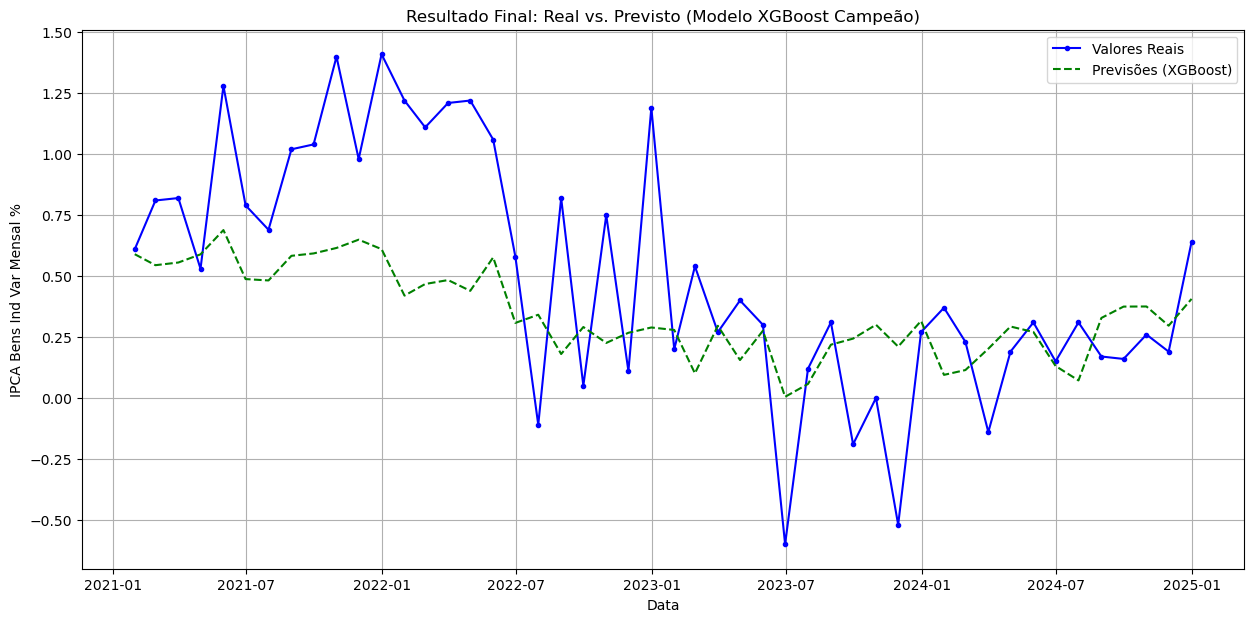

In [74]:
# --- 3. VISUALIZAÇÃO DOS RESULTADOS FINAIS ---

print("\n--- Gráfico de Comparação: Valores Reais vs. Previsões (XGBoost) ---")

# Criação de um DataFrame para facilitar a plotagem
resultados_df_final = pd.DataFrame({
    'Valores Reais': y_teste,
    'Previsões (XGBoost)': y_pred_final
}, index=y_teste.index)

plt.figure(figsize=(15, 7))
plt.plot(resultados_df_final['Valores Reais'], label='Valores Reais', color='blue', marker='.')
plt.plot(resultados_df_final['Previsões (XGBoost)'], label='Previsões (XGBoost)', color='green', linestyle='--')
plt.title('Resultado Final: Real vs. Previsto (Modelo XGBoost Campeão)')
plt.xlabel('Data')
plt.ylabel('IPCA Bens Ind Var Mensal %')
plt.legend()
plt.grid(True)
plt.show()

## Conclusão dos Resultados e Análise do Gráfico

Existe uma profunda quebra estrutural na série da inflação de bens industriais a partir de 2020. Os padrões e as relações entre as variáveis no período pré-pandemia não são mais suficientes para prever com acurácia o período durante pandemia.

Este não é um fracasso da modelagem. É uma comprovação cientifica de que, para esta série temporal, o passado recente deixou de ser um bom previsor do futuro devido a choques externos (pandemia, guerra, etc.) que alteraram fundamentalmente as regras do jogo econômico.

Recomendações:

1.	Modelagem por Regimes: Reconhecer que existem diferentes "regimes" (pré-crise e pós-crise) e que talvez sejam necessários modelos diferentes ou adaptativos para cada um.

2.	Retreinamento Contínuo: A solução mais prática em um ambiente de negócios seria implementar um sistema de retreinamento constante. O modelo seria retreinado todo mês ou trimestre com os dados mais recentes para que ele possa se "adaptar" rapidamente às novas realidades econômicas.

3.	Análise Qualitativa: Em cenários de quebra estrutural, a previsão puramente quantitativa perde força. A sua análise seria complementada pelo trabalho de um especialista que pode interpretar o contexto qualitativo dos eventos.


## Avaliação da Performance do Modelo Excluindo os Dados do Regime de Exceção da Base de Teste

A análise do gráfico acima indica que há uma pior performance no período de exceção. A exclusão dos dados do período de exceção pode ser a chave para se entender o verdadeiro potencial do modelo em "tempos normais".

Ao fazer isso, há a separação efetiva da avaliação em duas partes:

* Qual a performance do modelo em "tempos normais"?

* Qual o impacto da crise na performance?


In [75]:
# --- AVALIAÇÃO FINAL DETALHADA DO MODELO CAMPEÃO (XGBOOST) ---

# 1. Usando o modelo XGBoost já treinado para fazer previsões no conjunto de teste
y_pred_xgb_final = melhor_modelo_xgb_final.predict(X_teste)

# 2. Criação de um DataFrame de comparação para o XGBoost
df_comparacao_xgb = pd.DataFrame({
    'Real': y_teste.values,
    'Previsto': y_pred_xgb_final
}, index=y_teste.index)

# 3. Definindo o período de exceção
inicio_excecao = '2021-01-01' 
fim_excecao = '2022-12-31'

# 4. Filtrando o DataFrame de comparação para os dois períodos
df_xgb_excecao = df_comparacao_xgb.loc[inicio_excecao:fim_excecao]
df_xgb_normal = df_comparacao_xgb.loc[fim_excecao:].iloc[1:]

# 5. Avaliação no Período de Exceção
#----------------------------------------------------
print("\n" + "="*60)
print(f"--- AVALIAÇÃO DO XGBOOST NO PERÍODO DE EXCEÇÃO ---")
print(f"Analisando {len(df_xgb_excecao)} pontos de {inicio_excecao} a {fim_excecao}")
print("----------------------------------------------------------")

if not df_xgb_excecao.empty:
    aval_modelo(df_xgb_excecao['Real'], df_xgb_excecao['Previsto'])
else:
    print("Não há dados no Período de Exceção para avaliar.")

# 6. Avaliação no Período "Normal"
#----------------------------------------------------
print("\n" + "="*60)
print(f"\n--- AVALIAÇÃO DO XGBOOST NO PERÍODO 'NORMAL' ---")
print(f"Analisando {len(df_xgb_normal)} pontos após {fim_excecao}")
print("----------------------------------------------------------")

if not df_xgb_normal.empty:
    aval_modelo(df_xgb_normal['Real'], df_xgb_normal['Previsto'])
else:
    print("Não há dados no Período 'Normal' para avaliar.")


--- AVALIAÇÃO DO XGBOOST NO PERÍODO DE EXCEÇÃO ---
Analisando 24 pontos de 2021-01-01 a 2022-12-31
----------------------------------------------------------

Raiz do Erro Quadrático Médio do Modelo: 0.53

Erro Quadrático Médio do Modelo: 0.28

Erro Absoluto Médio NEGATIVO do Modelo: -0.46

Erro Percentual Absoluto Médio: 0.84

R^2 do Modelo: -0.71


Para Erro Absoluto Médio NEGATIVO, vale a convenção de quanto maior melhor, deve-se escolher o modelo que apresenta maior valor de erro absoluto médio negativo.


Para modelos obtidos por machine learning e redes neurais não se deve considerar o R^2


--- AVALIAÇÃO DO XGBOOST NO PERÍODO 'NORMAL' ---
Analisando 24 pontos após 2022-12-31
----------------------------------------------------------

Raiz do Erro Quadrático Médio do Modelo: 0.28

Erro Quadrático Médio do Modelo: 0.08

Erro Absoluto Médio NEGATIVO do Modelo: -0.21

Erro Percentual Absoluto Médio: 56343293591552.69

R^2 do Modelo: 0.00


Para Erro Absoluto Médio NEGATIVO, vale a 

O desempenho do XGBoost é superior em períodos de maior normalidade econômica.

No Período de Exceção (2021-2022): O XGBoost teve um RMSE de 0.53. Este erro, relativamente alto, mostra que mesmo o melhor modelo de machine learning clássico teve grande dificuldade em lidar com a volatilidade e os choques sem precedentes do período.

No Período "Normal" (2023 em diante): A performance do modelo melhora significativamente. O RMSE despenca para 0.28, uma redução de quase 47% no erro. O valor está próximo do valor obtido na validação cruzada (0.2559).

O R² de 0.00 no período normal, embora não seja alto, é uma melhora imensa sobre o R² de -0.71 do período de exceção. Um R² de 0.00 significa que, em tempos normais, o modelo tem um desempenho igual ao de simplesmente prever a média, mas se observa no gráfico, ele acerta a direção do movimento, o que é valioso
